# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Achmad Royhan Kamil
- **Email:** royhan1125@gmail.com
- **ID Dicoding:** aroyka

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peningkatan rental sepeda di tahun 2011? 
- Seberapa berpengaruh hawa / suasana dengan banyaknya penyewa sepeda? 

## Import Semua Packages/Library yang Digunakan

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [56]:
# pengambilan data
df = pd.read_csv("Data/day.csv")

#menampilkan data 5 teratas
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Missing Value

In [58]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melihat Validitas Data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

perubahan dari date yang berawal dari object menjadi date agar mudah dilakukan penyaringan

In [57]:
df["dteday"] = pd.to_datetime(df['dteday'])

Duplicated Data

In [60]:
# banyak data dupliksai
df.duplicated().sum()

0

In [61]:
# menampilkan data duplikat
df[df.duplicated]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Outlier Data

Pencarian outlier pada attribut instant

In [62]:
# pencarian outlier dengan menggunakan metode iqr
q25, q75 = np.percentile(df.instant, 25), np.percentile(df.instant, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df.instant if x < minimum or x > maximum]

outliers

[]

Pencarian outlier pada attribut temperatur

In [63]:
# pencarian outlier dengan menggunakan metode iqr
q25, q75 = np.percentile(df.temp, 25), np.percentile(df.temp, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df.temp if x < minimum or x > maximum]

outliers

[]

Pencarian outlier pada attribut total rental sepeda

In [64]:
# pencarian outlier dengan menggunakan metode iqr
q25, q75 = np.percentile(df.cnt, 25), np.percentile(df.cnt, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df.cnt if x < minimum or x > maximum]

outliers

[]

Pencarian outlier pada attribut cuaca

In [65]:
# pencarian outlier dengan menggunakan metode iqr
q25, q75 = np.percentile(df.weathersit, 25), np.percentile(df.weathersit, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df.weathersit if x < minimum or x > maximum]

outliers

[]

### Cleaning Data

Penanganan Missing Value

In [66]:
# menghilangkan data kosong
df.dropna(inplace=True)

# menampilkan banyak data kosong
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Penanganan Data Duplikat

In [67]:
# menghilangkan data duplikasi
df.drop_duplicates(inplace=True)

# banyak data duplikasi 
df.duplicated().sum()

0

Penanganan Outlier

## Exploratory Data Analysis (EDA)

### Explore ...

Menampilkan hasil rangkuman analisis Statistic

In [68]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Explore Data temp, windspeed, count, registered dengan melihat histogram attribut2 tersebut

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'registered'}>]], dtype=object)

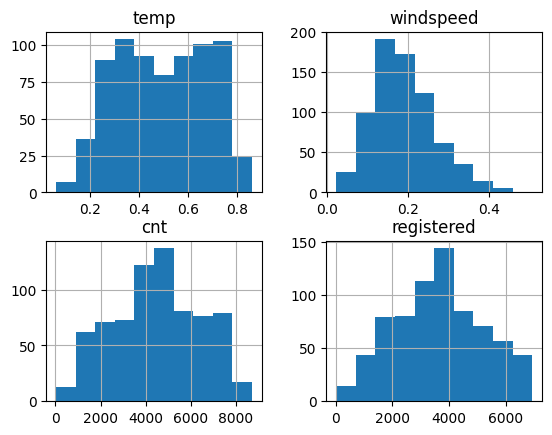

In [69]:
df[["temp", "windspeed", "cnt", "registered"]].hist()

Melihat dari korelasi antar atribut

In [70]:
df.drop(columns="dteday").corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Melihat hasil dari korelasi

In [71]:
df[["mnth", "cnt"]].corr()

,mnth,cnt
mnth,1.000000,0.279977
cnt,0.279977,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peningkatan rental sepeda di tahun 2011? 

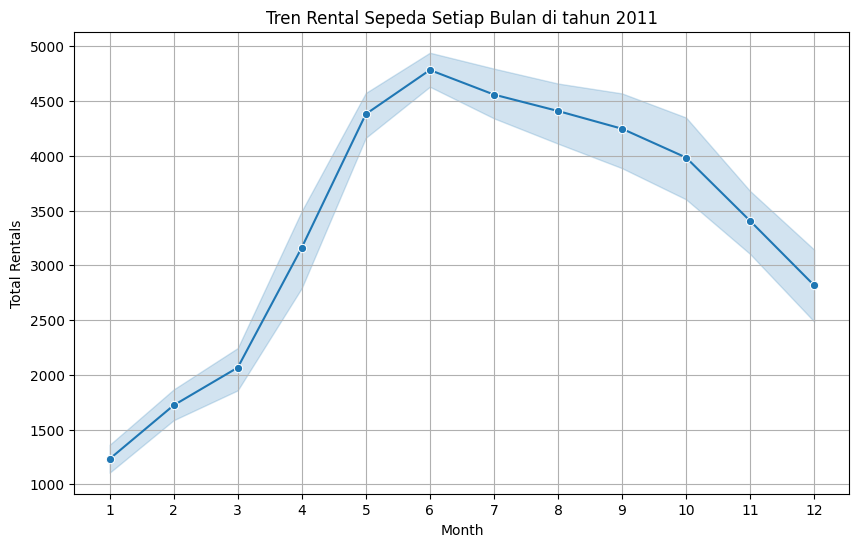

In [94]:
# menyiapkan gradik
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["mnth"], y=df[df["dteday"].dt.year == 2011]["cnt"], marker='o')
plt.title("Tren Rental Sepeda Setiap Bulan di tahun 2011")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


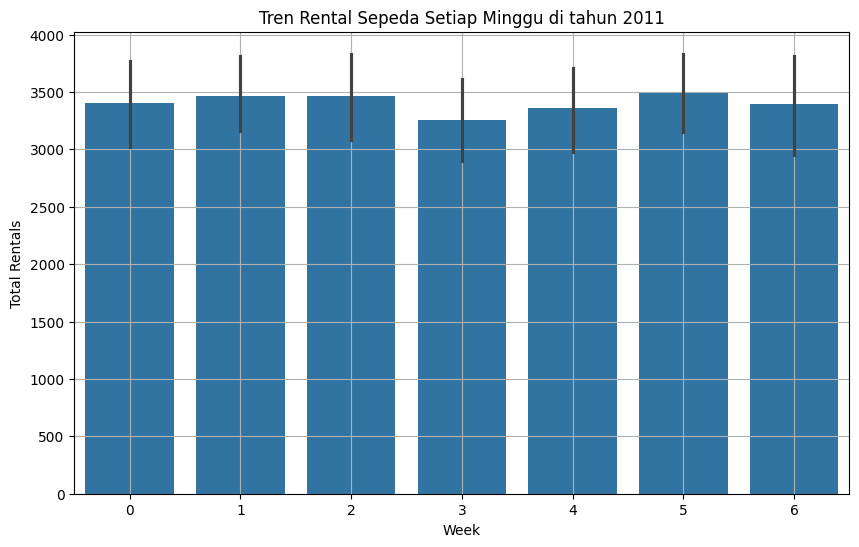

In [95]:
# menyiapkan grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=df["weekday"], y=df[df["dteday"].dt.year == 2011]["cnt"])
plt.title("Tren Rental Sepeda Setiap Minggu di tahun 2011")
plt.xlabel("Week")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()


### Pertanyaan 2: Apa dampak dari hawa / suasana dengan banyaknya penyewa sepeda? 

C:\Users\USER\AppData\Local\Temp\ipykernel_23468\682441785.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='temp', y='cnt', hue='weathersit', palette=dark_palette, alpha=0.7, )


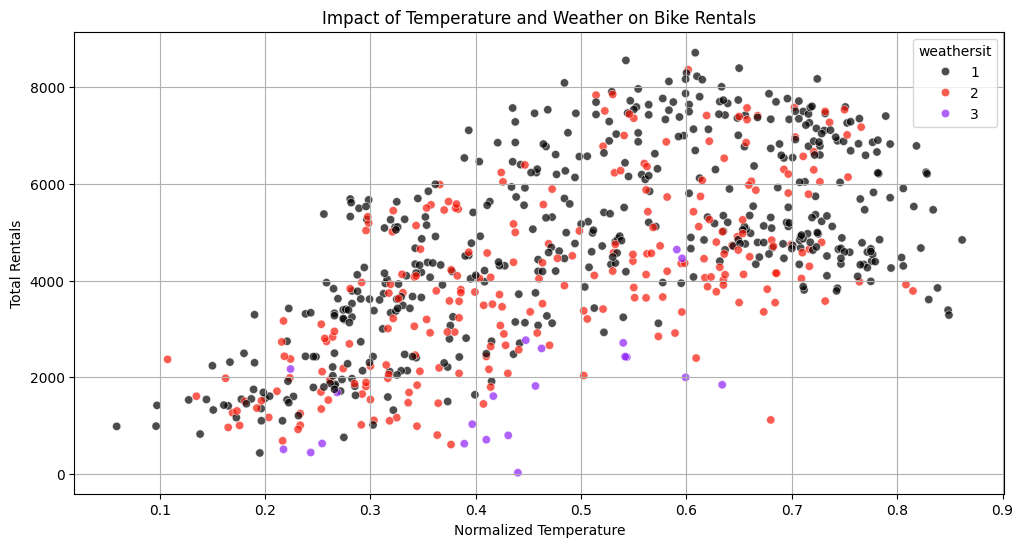

In [91]:
# menentukan kolor paletnya
dark_palette = sns.color_palette(["#000", "#f71707", "#8e1ef7", "#0008ff", "#22e322"])

# menyiapkan grafik
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temp', y='cnt', hue='weathersit', palette=dark_palette, alpha=0.7, )
plt.title("Pengaruh Suasana dengan banyaknya penyewa sepeda")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()

<Axes: >

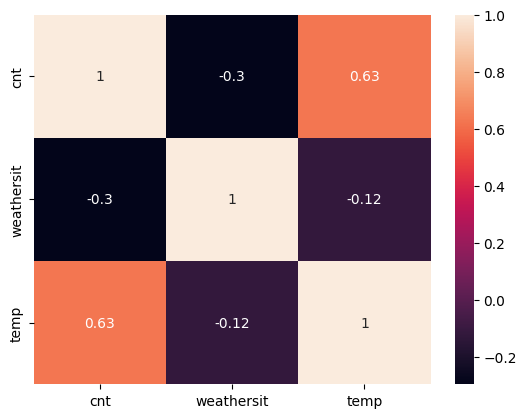

In [93]:
# akan menampilkan hasil korelasi antar variable
sns.heatmap(df[["cnt", "weathersit", "temp"]].corr(), annot=True)

## Conclusion

- Untuk trend pada **bulan** dengan tingkat **rental sepeda terbanyak** yaitu pada bulan **Juni**. Untuk **Hari** dengan **tingkat rental terbanyak** yaitu di hari **Sabtu**. Dalam hal ini dapat disimpulkan keterpengaruhan hari libur dengan banyaknya perental sepeda
- Kita dapat melihat kalau **hawa / suasana** dapat **berdampak** dengan hasil **banyaknya penyewa sepeda**. Jika hasil **temperatur tinggi** akan menghasilkan jauh **lebih sedikit** **penyewa** daripada ketika **temperaturnya tinggi**. **Penyewa terbanyak** ketika temperatur nya menengah (0.6-0.7) atau pada **tingkatan hangat**. Hal ini juga berlaku dengan cuaca, jika **cuacanya cerah** maka tingkat **penyewa jauh lebih tinggi.**